In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from modules.qr_code import QrCode, Measurement

# Loading data
camera_columns = ['timestamp', 'qr_code', 'cx', 'cy', 'width', 'height', 'distance', 'attitude']

qr_df = pd.read_csv('../data/qr_code_position_in_global_coordinate.csv')
camera_df = pd.read_csv('../data/task5/camera_localization_task5.csv', header=None, names=camera_columns)

In [12]:
# Setting up required QR codes' data for the task

qr_codes = []
for index, row in qr_df.iterrows():
    if row['position_in_wall'] == 2 and row['qr_code'] != 13:
        qr = QrCode(int(row['qr_code']), row['mid_point_x_cm'], row['mid_point_y_cm'])
        qr_codes.append(qr)

for qr in qr_codes:
    for index, row in camera_df.iterrows():
        if row['qr_code'] == qr.id:
            qr.add_measurement(Measurement(row['timestamp'], row['cx'], row['height']))

In [13]:
#Compute the variances of the measurements
for qr in qr_codes:
    qr.compute_variance()

In [14]:
from modules.localization import Localization

localization = Localization(h0=11.5, path="../data/task3/camera_module_calibration_task3.csv", qr_codes=qr_codes, distance_bias=6.7)

In [15]:
localization.R_inv

array([[ 4.386,  0.   ],
       [ 0.   , 21.739]])

In [16]:
localization.localize(iteration_end=10, x_0=[55, 28, 77*np.pi/180])

In [17]:
Grid_size = 500
x1s = np.linspace(100,100, Grid_size) # creating linearly spaced values in the interval (0, 1)
x2s = np.linspace(100,100, Grid_size)
x_grid,y_grid = np.meshgrid(x1s,x2s) # creating rectangular grid
J = np.zeros((Grid_size,Grid_size))

Estimation(px=np.float64(42.57474726973196), py=np.float64(31.59515537098158), psi=np.float64(1.3438889678189123))
Estimation(px=np.float64(43.579779772725026), py=np.float64(30.951128842141408), psi=np.float64(1.3438342899908162))
Estimation(px=np.float64(45.07991701749786), py=np.float64(30.440502150126523), psi=np.float64(1.3441042681822704))
Estimation(px=np.float64(44.886632332788245), py=np.float64(29.153327579522777), psi=np.float64(1.3439060634609612))
Estimation(px=np.float64(44.29554262444909), py=np.float64(29.450274858131763), psi=np.float64(1.3439253786648366))
Estimation(px=np.float64(42.58904157866404), py=np.float64(29.448291408555566), psi=np.float64(1.3439494168981896))
Estimation(px=np.float64(39.79742812215339), py=np.float64(29.956200920061562), psi=np.float64(1.3440030735527795))
Estimation(px=np.float64(39.88472107543085), py=np.float64(32.23972302061992), psi=np.float64(1.3442348805150914))


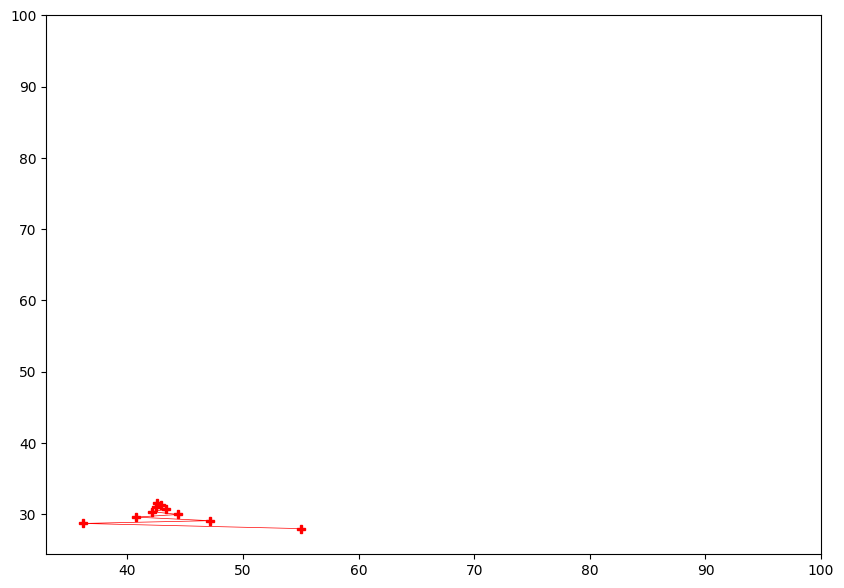

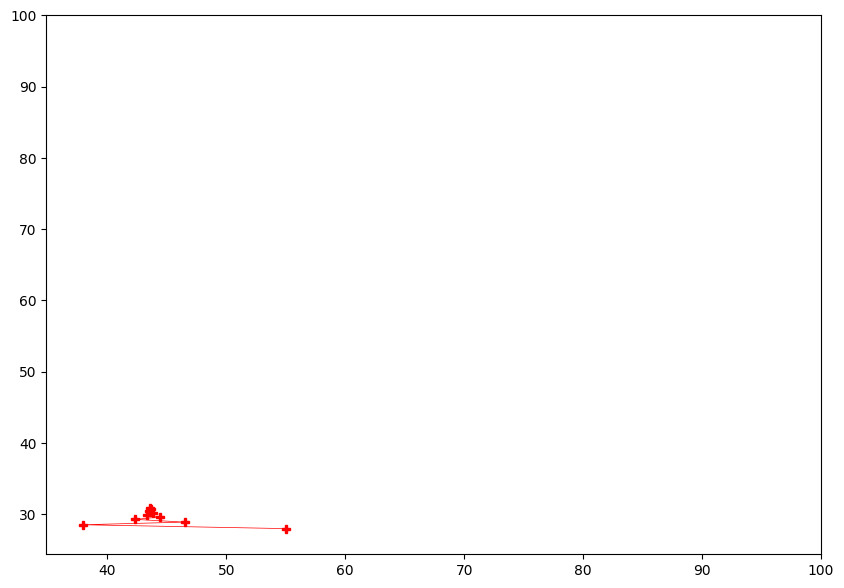

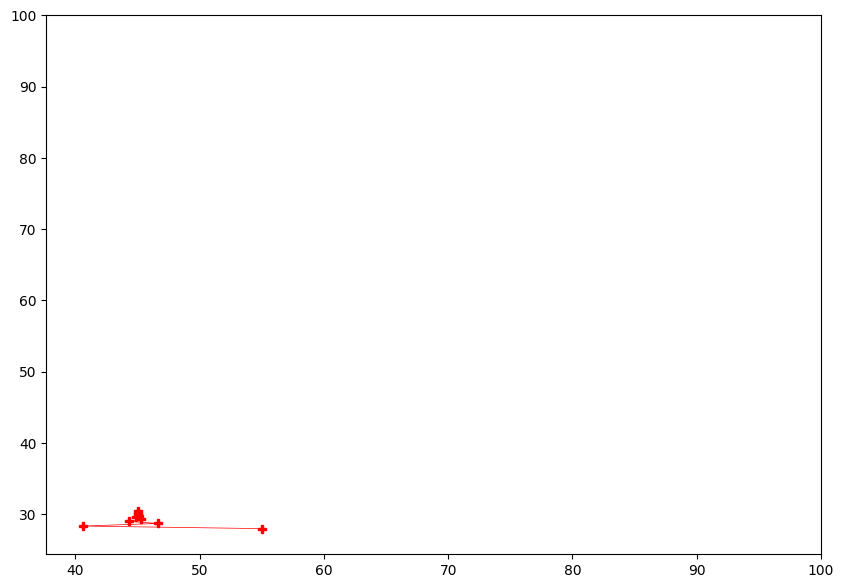

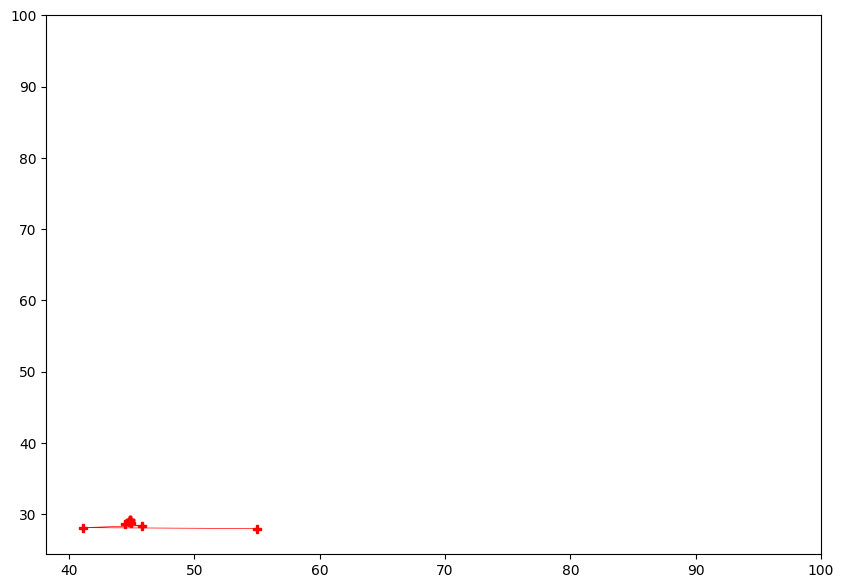

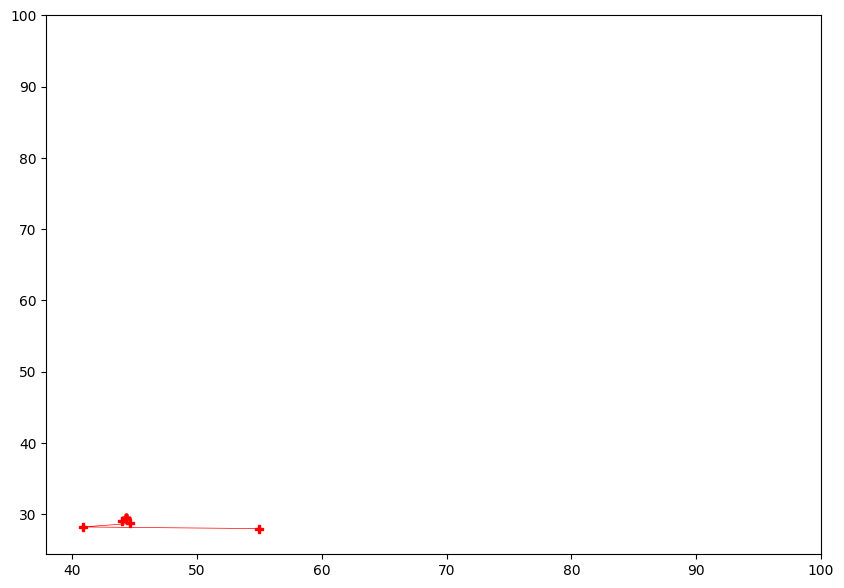

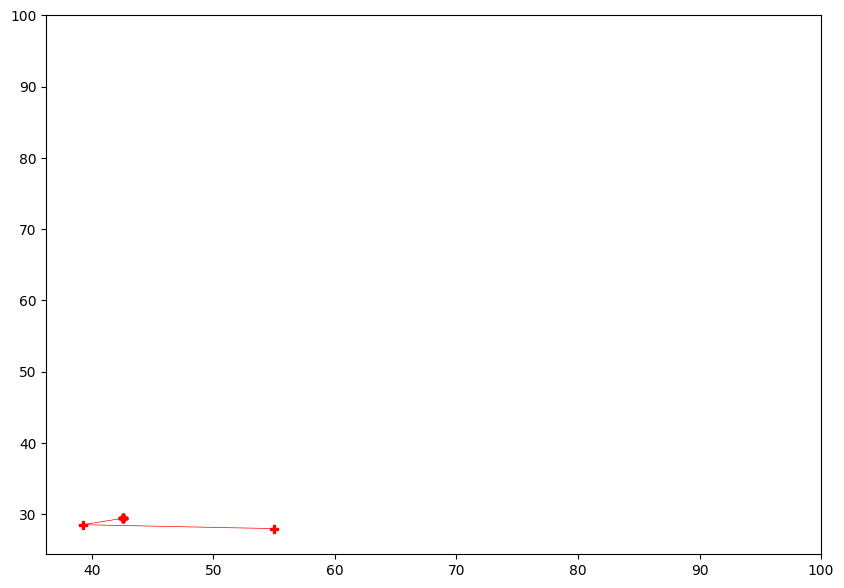

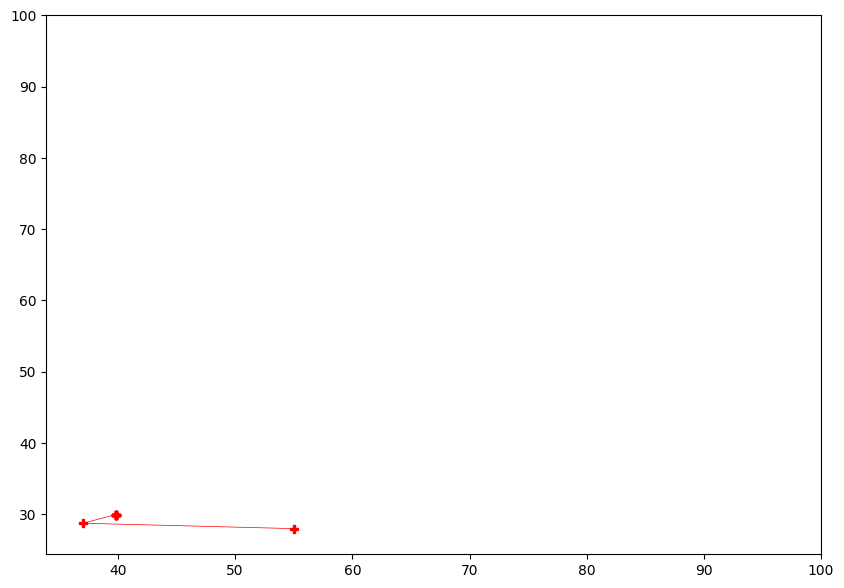

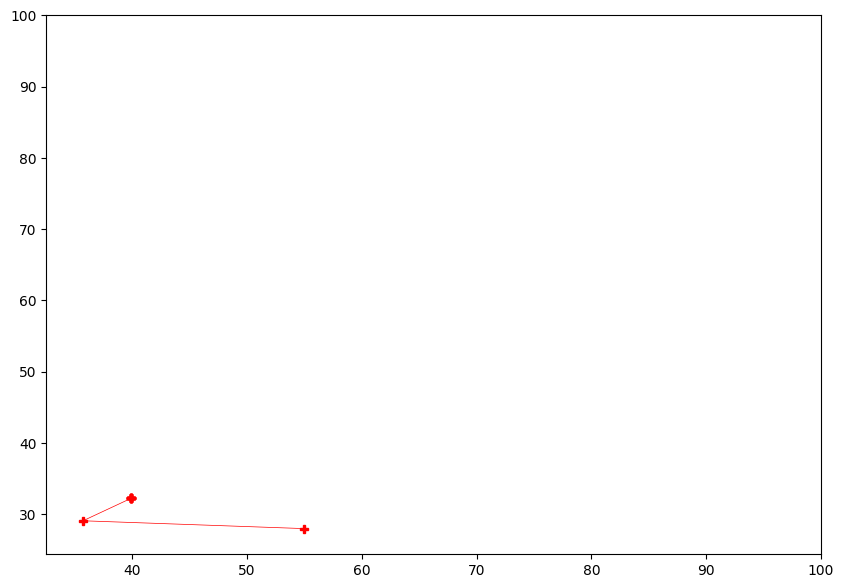

In [18]:
for qr in qr_codes:
    print(qr.estimation[-1])
    plt.figure(figsize=(10,7))
    plt.contourf(x_grid,y_grid,J, 100)
    plt.plot([[estimation.px] for estimation in qr.estimation],[[estimation.py] for estimation in qr.estimation],c='r',marker="P",linewidth=0.5)